## Measuring the latent representations: activations of the message functions

In [251]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)

from model import *
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset

In [252]:
#load the data
data = load_data('../simulations/datasets/r1_n=3_dim=2_nt=1000_dt=0.005')
X, y = data

#make train, test, val sets
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, shuffle=False)

train the model

In [253]:
cutoff = 30000
val_cutoff = 2500

#train the model on a small amount of data
model = train((X_train[:cutoff], y_train[:cutoff]), (X_val[:cutoff], y_val[:cutoff]), 30)

Epoch: 1/30: 100%|██████████| 938/938 [00:05<00:00, 180.38it/s]


training loss: 0.8403, val loss: 1.1546


Epoch: 2/30: 100%|██████████| 938/938 [00:05<00:00, 176.70it/s]


training loss: 0.4916, val loss: 0.8782


Epoch: 3/30: 100%|██████████| 938/938 [00:05<00:00, 175.25it/s]


training loss: 0.4024, val loss: 0.6691


Epoch: 4/30: 100%|██████████| 938/938 [00:05<00:00, 168.10it/s]


training loss: 0.3324, val loss: 0.6444


Epoch: 5/30: 100%|██████████| 938/938 [00:05<00:00, 166.89it/s]


training loss: 0.3223, val loss: 0.6426


Epoch: 6/30: 100%|██████████| 938/938 [00:04<00:00, 189.37it/s]


training loss: 0.3225, val loss: 0.5930


Epoch: 7/30: 100%|██████████| 938/938 [00:05<00:00, 171.56it/s]


training loss: 0.2910, val loss: 0.6815


Epoch: 8/30: 100%|██████████| 938/938 [00:05<00:00, 171.58it/s]


training loss: 0.2773, val loss: 0.6536


Epoch: 9/30: 100%|██████████| 938/938 [00:05<00:00, 168.52it/s]


training loss: 0.2595, val loss: 0.5783


Epoch: 10/30: 100%|██████████| 938/938 [00:05<00:00, 163.10it/s]


training loss: 0.2636, val loss: 0.5672


Epoch: 11/30: 100%|██████████| 938/938 [00:04<00:00, 187.81it/s]


training loss: 0.2670, val loss: 0.5146


Epoch: 12/30: 100%|██████████| 938/938 [00:05<00:00, 164.15it/s]


training loss: 0.2455, val loss: 0.5106


Epoch: 13/30: 100%|██████████| 938/938 [00:05<00:00, 161.04it/s]


training loss: 0.2414, val loss: 0.5197


Epoch: 14/30: 100%|██████████| 938/938 [00:05<00:00, 162.28it/s]


training loss: 0.2347, val loss: 0.4946


Epoch: 15/30: 100%|██████████| 938/938 [00:05<00:00, 164.93it/s]


training loss: 0.2373, val loss: 0.5229


Epoch: 16/30: 100%|██████████| 938/938 [00:05<00:00, 166.42it/s]


training loss: 0.2242, val loss: 0.4919


Epoch: 17/30: 100%|██████████| 938/938 [00:05<00:00, 161.50it/s]


training loss: 0.2386, val loss: 0.5200


Epoch: 18/30: 100%|██████████| 938/938 [00:05<00:00, 166.93it/s]


training loss: 0.2245, val loss: 0.6466


Epoch: 19/30: 100%|██████████| 938/938 [00:05<00:00, 163.42it/s]


training loss: 0.2362, val loss: 0.4555


Epoch: 20/30: 100%|██████████| 938/938 [00:05<00:00, 180.17it/s]


training loss: 0.2286, val loss: 0.5320


Epoch: 21/30: 100%|██████████| 938/938 [00:06<00:00, 156.19it/s]


training loss: 0.2496, val loss: 0.5786


Epoch: 22/30: 100%|██████████| 938/938 [00:05<00:00, 160.40it/s]


training loss: 0.2077, val loss: 0.5589


Epoch: 23/30: 100%|██████████| 938/938 [00:05<00:00, 164.83it/s]


training loss: 0.2226, val loss: 0.7003


Epoch: 24/30: 100%|██████████| 938/938 [00:05<00:00, 165.81it/s]


training loss: 0.2239, val loss: 0.5795


Epoch: 25/30: 100%|██████████| 938/938 [00:05<00:00, 166.28it/s]


training loss: 0.2186, val loss: 0.5406


Epoch: 26/30: 100%|██████████| 938/938 [00:05<00:00, 161.84it/s]


training loss: 0.2246, val loss: 0.6177


Epoch: 27/30: 100%|██████████| 938/938 [00:05<00:00, 165.11it/s]


training loss: 0.2215, val loss: 0.5552


Epoch: 28/30: 100%|██████████| 938/938 [00:05<00:00, 159.80it/s]


training loss: 0.2266, val loss: 0.5615


Epoch: 29/30: 100%|██████████| 938/938 [00:05<00:00, 179.09it/s]


training loss: 0.2141, val loss: 0.4626


Epoch: 30/30: 100%|██████████| 938/938 [00:05<00:00, 164.44it/s]


training loss: 0.2125, val loss: 0.6731


save the trained model to use later

In [254]:
checkpoint = {
    'model_state_dict': model.state_dict(),     # Model weights
    'edge_model': model.edge_model.state_dict(),  # Edge MLP state
    'node_model': model.node_model.state_dict(),  # Node MLP state
    'node_dim': 6,        # Your model's dimensions from __init__
    'acc_dim': 2,         # Acceleration dimensions (2 for 2D)
    'hidden_dim': 300     # Hidden layer dimensions
}
torch.save(checkpoint, 'nbody_model2.pt')

In [255]:
checkpoint = torch.load('nbody_model2.pt')
model = NBodyGNN(
    node_dim=checkpoint['node_dim'],
    acc_dim=checkpoint['acc_dim'],
    hidden_dim=checkpoint['hidden_dim']
)
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [256]:
TensorDataset(X_test)

In [239]:
X_test.shape

torch.Size([187500, 3, 6])

get the message features along with other information from the trained model and test data

In [204]:
def get_message_features(model, input_data, batch_size=32):
    """
    Make pd.Dataframe of messages and particle information
    
    Args:
        model (NBodyGNN): Trained model
        input_data (torch.Tensor): Input data with shape [no_timesteps, no_nodes, node_features]
        batch_size (int): Size of batches to process
        
    Returns:
        pd.DataFrame: DataFrame containing node features and message features
        numpy.ndarray: just the message features
    """

    model.eval()  
    edge_index = get_edge_index(input_data.shape[1])
    
    # Create dataloader
    dataset = TensorDataset(input_data)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
    
    all_message_info = []
    
    with torch.no_grad():
        for (nodes,) in dataloader:
            x_i = nodes[:, edge_index[0]]  # Source nodes
            x_j = nodes[:, edge_index[1]]  # Target nodes
            
            x = torch.cat((x_i, x_j), dim=-1)
            messages = model.edge_model(x) #put thru edge model
            #messages shape is [batch_size, num_edges, 100]
            
            #combine node features with messages along final axis
            message_info = torch.cat((x_i, x_j, messages), dim=-1)
            
            #reshape batch_messages to be 2D for pandas: [batch_size * num_edges, features]
            #batch info and edge info doesnt matter. only related feature info and latent messages
            message_info = message_info.reshape(-1, message_info.shape[-1])
            all_message_info.append(message_info)
    
    # Combine all batches
    message_info = torch.cat(all_message_info, dim=0)
    
    # Convert to numpy for DataFrame creation
    message_info = message_info.numpy()
    
    # Create column names
    node_info = ['x', 'y', 'delta_x', 'delta_y', 'q', 'm'] #for 2d
    source_cols = [f'{f}1' for f in node_info]
    target_cols = [f'{f}2' for f in node_info]
    message_cols = [f'e{i}' for i in range(messages.shape[-1])]
    columns = source_cols + target_cols + message_cols
    
    # Create DataFrame
    message_info = pd.DataFrame(message_info, columns=columns)
    
    # distances between particles
    message_info['x_dist'] = message_info.x1 - message_info.x2
    message_info['y_dist'] = message_info.y1 - message_info.y2
    message_info['r'] = np.sqrt(message_info.x_dist**2 + message_info.y_dist**2)
    
    # Calculate relative velocities
    message_info['dvx'] = message_info.delta_x1 - message_info.delta_x2
    message_info['dvy'] = message_info.delta_y1 - message_info.delta_y2
    message_info['v_rel'] = np.sqrt(message_info.dvx**2 + message_info.dvy**2)

    message_cols = [col for col in message_info.columns if col.startswith('e')]
    message_features = message_info[message_cols].values #shape is [batch_size * num edges, 100]
    
    return message_info, message_features

standard message model (100 outputs). plot the message 

In [205]:
def get_important_features(message_features):
    """get most important (top 2) features (standard) by measuring variance over all data

    Args:
        message_features (numpy.ndarray): just the message features. of shape [datapoints, 100]

    Returns:
        numpy.ndarray: most important two messages. of shape [datapoints, 2]
    """
    std = message_features.std(axis = 0)
    important_elements = np.argsort(std)[-2:]
    return message_features[:, important_elements]

In [206]:
def get_force(message_info, sim = 'r1'):
    """
    get forces for the different simulations
    """
    x_dist = message_info['x_dist']
    y_dist = message_info['y_dist']
    r = message_info['r']
    m1m2 = message_info['m1'] * message_info['m2']
    eps = 1e-6
    if sim == 'r1':
        f = - m1m2 / (r*r + eps)
        f_x = f * x_dist / (r+eps)
        f_y = f * y_dist / (r+eps)
    return np.array(f), np.array(f_x), np.array(f_y)


In [300]:
cutoff_test =10000
message_info, message_features = get_message_features(model, X_test[:cutoff_test])

In [309]:
best_messages = get_important_features(message_features)
best_messages[:,0]


array([ 0.47653762, -0.01234651, -0.40276343, ...,  0.15184045,
        0.00521086, -0.21768725], shape=(60000,), dtype=float32)

In [310]:
_, fx, fy = get_force(message_info)

fit linear combination of forces to messsage components-linear regression tings

In [311]:
from sklearn.linear_model import LinearRegression


#currently removing percentage outliers for fitting
#is this ok? who knows - probably change this when can train the model more later
def remove_outliers(fx, fy, best_messages, perc):
    lower_bound_x = np.percentile(fx, perc)
    upper_bound_x = np.percentile(fx, 100 - perc)
    
    # Calculate percentile bounds for fy
    lower_bound_y = np.percentile(fy, perc)
    upper_bound_y = np.percentile(fy, 100 - perc)
    
    # Create masks for each array
    mask_x = (fx >= lower_bound_x) & (fx <= upper_bound_x)
    mask_y = (fy >= lower_bound_y) & (fy <= upper_bound_y)
    
    # Combined mask - keep only points where both fx and fy are not outliers
    combined_mask = mask_x & mask_y

    fx_clean = fx[combined_mask]
    fy_clean = fy[combined_mask]
    best_messages_clean = best_messages[combined_mask, :]


    return fx_clean, fy_clean, best_messages_clean


def fit_coefficients(message_elem, fx, fy):
    """
    Fit coefficients for linear combination of forces
    Returns a, b coefficients for a*fx + b*fy
    """
    X = np.column_stack([fx, fy])
    lin_reg = LinearRegression()
    lin_reg.fit(X, message_elem)
    return lin_reg.coef_[0], lin_reg.coef_[1]

In [312]:
fx, fy, best_messages = remove_outliers(fx, fy, best_messages, perc=10)

In [313]:
a,b = fit_coefficients(best_messages[:,0], fx, fy)
c,d = fit_coefficients(best_messages[:,1], fx, fy)

In [314]:
import matplotlib.pyplot as plt

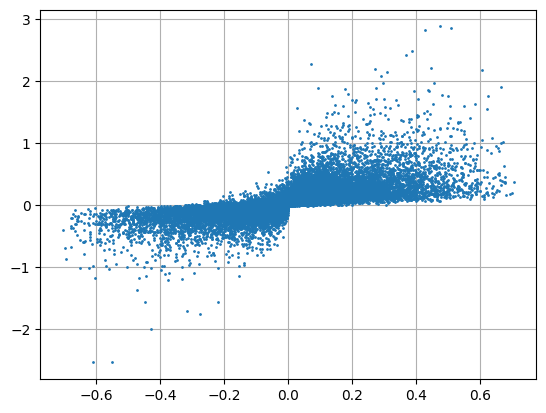

In [315]:
lin_combo1 = a*fx +b*fy
plt.plot(lin_combo1, best_messages[:,0], 'o', markersize = '1')
plt.grid()
#plt.xlim(-1,1)
#plt.ylim(-0.1,0.1)

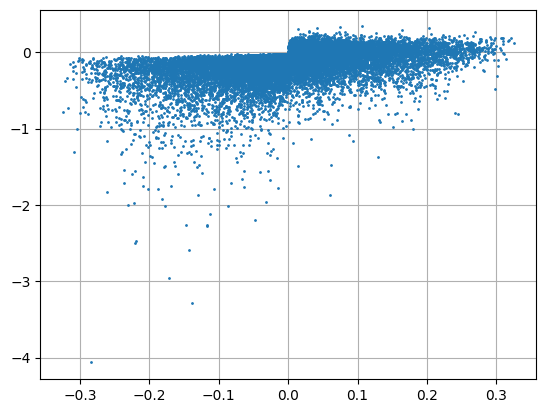

In [316]:
lin_combo2 = c*fx +d*fy
plt.plot(lin_combo2, best_messages[:,1], 'o', markersize = '1')
plt.grid()
#plt.xlim(-0.1,0.1)
#plt.ylim(-1,1)